<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/BT1_GRAB_BIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.2 MB/s eta 0:00:00


In [13]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Khai báo các biến đầu vào
ride_distance = ctrl.Antecedent(np.arange(0, 50.1, 0.1), 'ride_distance')
traffic_condition = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'traffic_condition')
demand_level = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'demand_level')
weather_condition = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'weather_condition')
customer_rating = ctrl.Antecedent(np.arange(1, 6.1, 0.1), 'customer_rating')
ride_punctuality = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'ride_punctuality')

# Khai báo các biến đầu ra
ride_price = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'ride_price')
reward_points = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'reward_points')

# Định nghĩa các hàm thành viên cho biến đầu vào và đầu ra
ride_distance.automf(names=['short', 'medium', 'long', 'very_long'])
traffic_condition.automf(names=['low', 'medium', 'high'])
demand_level.automf(names=['low', 'medium', 'high'])
weather_condition.automf(names=['good', 'moderate', 'bad'])
customer_rating.automf(names=['poor', 'average', 'good'])
ride_punctuality.automf(names=['late', 'on_time', 'early'])
ride_price.automf(names=['low', 'medium', 'high', 'very_high'])
reward_points.automf(names=['none', 'few', 'moderate', 'high'])

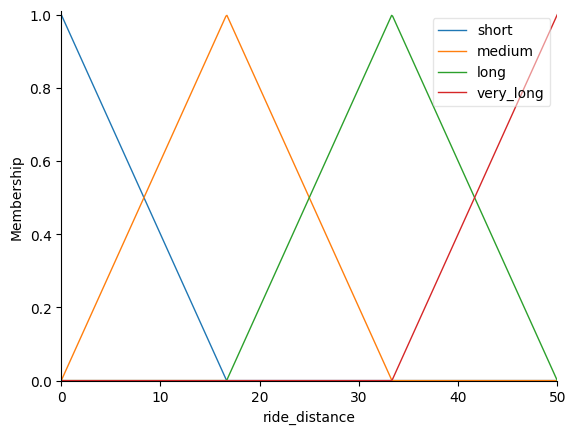

In [4]:
ride_distance.view()

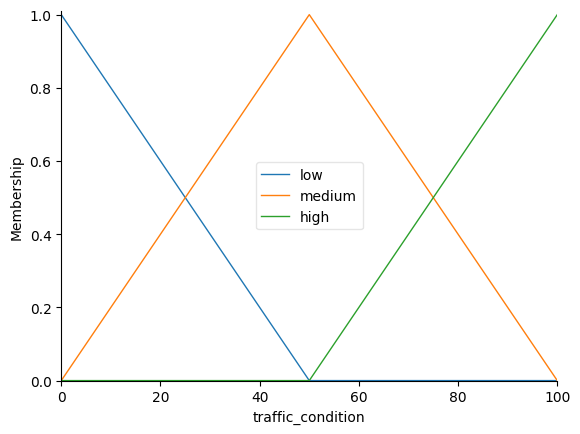

In [5]:
traffic_condition.view()

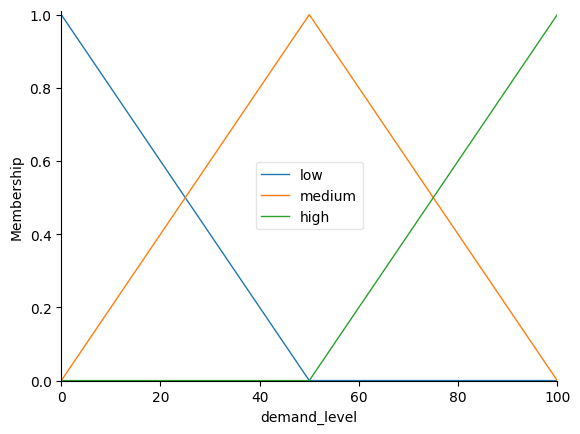

In [6]:
demand_level.view()

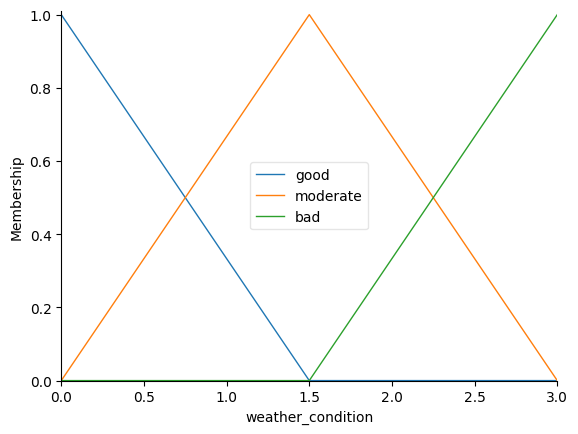

In [7]:
weather_condition.view()

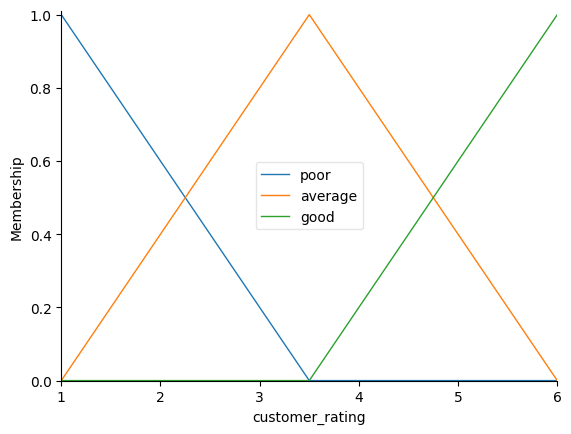

In [8]:
customer_rating.view()

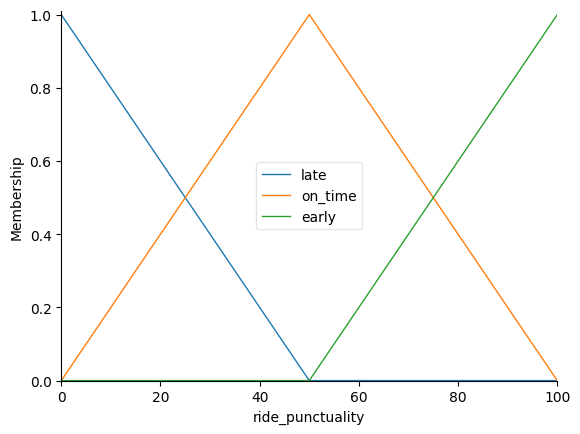

In [9]:
ride_punctuality.view()

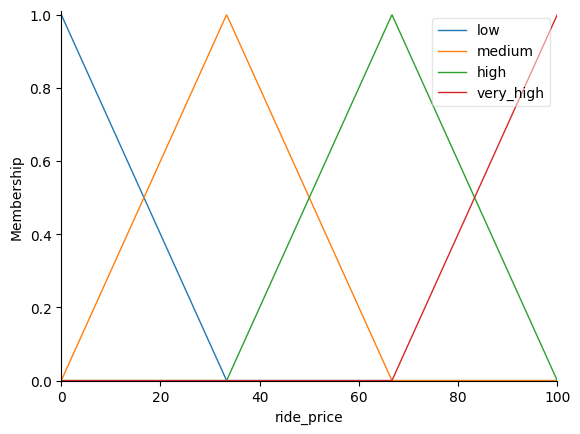

In [10]:
ride_price.view()

In [14]:
# Định nghĩa các luật mờ
rules = [
    ctrl.Rule(ride_distance['short'] & traffic_condition['low'] & demand_level['low'], ride_price['low']),
    ctrl.Rule(ride_distance['short'] & traffic_condition['medium'] & demand_level['high'], ride_price['medium']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['high'] & demand_level['high'], ride_price['high']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['medium'] & weather_condition['good'], ride_price['medium']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & weather_condition['bad'], ride_price['very_high']),
    ctrl.Rule(ride_distance['very_long'] & traffic_condition['high'] & demand_level['high'], ride_price['very_high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['low'] & demand_level['low'], ride_price['medium']),
    ctrl.Rule(ride_distance['short'] & traffic_condition['high'] & weather_condition['bad'], ride_price['high']),
    ctrl.Rule(ride_distance['very_long'] & weather_condition['bad'], ride_price['very_high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & weather_condition['moderate'], ride_price['medium']),
    ctrl.Rule(customer_rating['good'] & ride_punctuality['early'], reward_points['high']),
    ctrl.Rule(customer_rating['average'] & ride_punctuality['on_time'], reward_points['moderate']),
    ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], reward_points['none']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['on_time'], reward_points['high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & customer_rating['good'], reward_points['moderate']),
    ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], reward_points['none']),
    ctrl.Rule(ride_distance['very_long'] & weather_condition['bad'] & customer_rating['good'], reward_points['high']),
    ctrl.Rule(ride_distance['short'] & customer_rating['average'] & ride_punctuality['on_time'], reward_points['few']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['late'], reward_points['few']),
    ctrl.Rule(ride_distance['medium'] & weather_condition['moderate'] & customer_rating['good'], reward_points['moderate']),
]

In [29]:
# Tạo hệ thống điều khiển
pricing_control = ctrl.ControlSystem(rules)
pricing_simulation = ctrl.ControlSystemSimulation(pricing_control)

# Nhập dữ liệu đầu vào
pricing_simulation.input['ride_distance'] = 55
pricing_simulation.input['traffic_condition'] = 90
pricing_simulation.input['demand_level'] = 80
pricing_simulation.input['weather_condition'] = 9
pricing_simulation.input['customer_rating'] = 5
pricing_simulation.input['ride_punctuality'] = 90


Ride Price: 88.88884442231112
Reward Points: 76.55906489907376
Reward Level: High
Ride Price Level: Very High


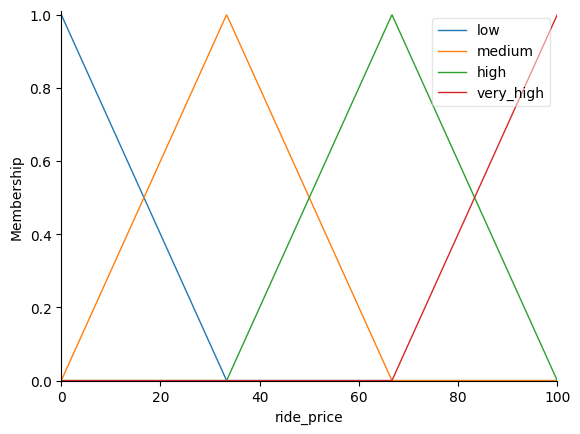

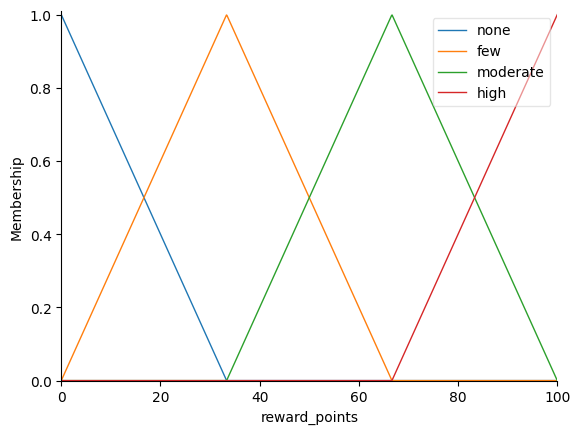

In [37]:
pricing_simulation.compute()
ride_price.view()
reward_points.view()
print(f"Ride Price: {pricing_simulation.output['ride_price']}")
print(f"Reward Points: {pricing_simulation.output['reward_points']}")

# In mức độ điểm thưởng
def get_reward_level(points):
    if points < 25:
        return "None"
    elif points < 50:
        return "Few"
    elif points < 75:
        return "Moderate"
    else:
        return "High"
reward_level = get_reward_level(pricing_simulation.output['reward_points'])
print(f"Reward Level: {reward_level}")

# In mức độ giá đi xe
def get_price_level(price):
    if price < 25:
        return "Low"
    elif price < 50:
        return "Medium"
    elif price < 75:
        return "High"
    else:
        return "Very High"

price_level = get_price_level(pricing_simulation.output['ride_price'])
print(f"Ride Price Level: {price_level}")
